In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
dataset = pd.read_csv('Placement.csv')

In [3]:
df = dataset.copy()
# Convert the target to a binary number (e.g., 1 for Placed, 0 for Not Placed)
df['is_placed'] = df['status'].apply(lambda x: 1 if x == 'Placed' else 0)
# Select features (excluding the original 'status' and any ID columns)
X = df.drop(['status', 'is_placed'], axis=1)
y = df['is_placed']
# Convert categorical variables into dummy/indicator variables (required for most models)
X = pd.get_dummies(X, drop_first=True)

# Handle missing values (important step! Fill with median/mode or drop rows)
X = X.fillna(X.median())

In [4]:
X.isna().sum()

sl_no                    0
ssc_p                    0
hsc_p                    0
degree_p                 0
etest_p                  0
mba_p                    0
salary                   0
gender_M                 0
ssc_b_Others             0
hsc_b_Others             0
hsc_s_Commerce           0
hsc_s_Science            0
degree_t_Others          0
degree_t_Sci&Tech        0
workex_Yes               0
specialisation_Mkt&HR    0
dtype: int64

In [5]:
X

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
0,1,67.00,91.00,58.00,55.0,58.80,270000.0,1,1,1,1,0,0,1,0,1
1,2,79.33,78.33,77.48,86.5,66.28,200000.0,1,0,1,0,1,0,1,1,0
2,3,65.00,68.00,64.00,75.0,57.80,250000.0,1,0,0,0,0,0,0,0,0
3,4,56.00,52.00,52.00,66.0,59.43,265000.0,1,0,0,0,1,0,1,0,1
4,5,85.80,73.60,73.30,96.8,55.50,425000.0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,400000.0,1,1,1,1,0,0,0,0,0
211,212,58.00,60.00,72.00,74.0,53.62,275000.0,1,1,1,0,1,0,1,0,0
212,213,67.00,67.00,73.00,59.0,69.72,295000.0,1,1,1,1,0,0,0,1,0
213,214,74.00,66.00,58.00,70.0,60.23,204000.0,0,1,1,1,0,0,0,0,1


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importance = pd.Series(model.feature_importances_, index=X_train.columns)

C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):
C:\Users\Ilango\AppData\Local\anaconda3\envs\aiml\lib\site-packages\sklearn\utils\fixes.py:230: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if _joblib.__version__ >= LooseVersion('0.12'):



--- Top 10 Factors Predicting Placement Status ---
ssc_p                    0.234817
salary                   0.231976
degree_p                 0.163158
hsc_p                    0.138061
mba_p                    0.070730
etest_p                  0.043434
sl_no                    0.041845
workex_Yes               0.019243
specialisation_Mkt&HR    0.015943
gender_M                 0.013056
dtype: float64


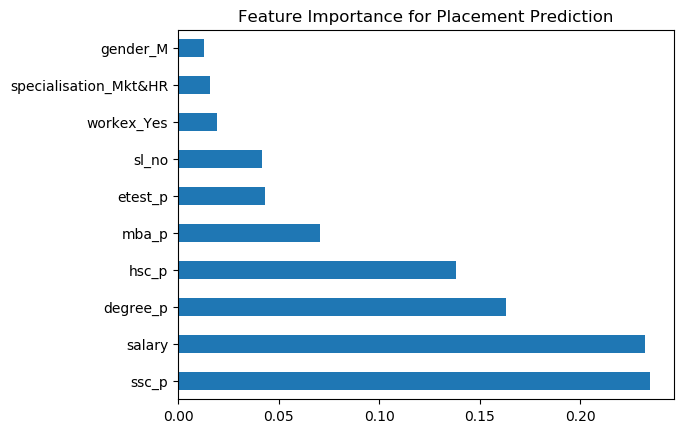

In [7]:
# Sort and display the top 10 most important features
import matplotlib.pyplot as plt
top_features = importance.sort_values(ascending=False).head(10)

print("\n--- Top 10 Factors Predicting Placement Status ---")
print(top_features)

# Visualize the top factors 
top_features.plot(kind='barh')
plt.title('Feature Importance for Placement Prediction')
plt.show()